In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


In [2]:
warnings.filterwarnings("ignore")


In [3]:
newsgroups_with_metadata = fetch_20newsgroups(subset='all')
X_with_metadata, y_with_metadata = newsgroups_with_metadata.data, newsgroups_with_metadata.target
categories = newsgroups_with_metadata.target_names

In [4]:
print(f"Number of Articles: {len(X_with_metadata)}")
print(f"Number of Categories: {len(categories)}")
print(f"Categories: {categories}")

print("Example (Category):", categories[y_with_metadata[0]])
print("\nExample:\n", X_with_metadata[0][:1000]) 

Number of Articles: 18846
Number of Categories: 20
Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Example (Category): rec.sport.hockey

Example:
 From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are k

In [5]:
df = pd.DataFrame({'Category': [categories[label] for label in y_with_metadata], 'Text': X_with_metadata})


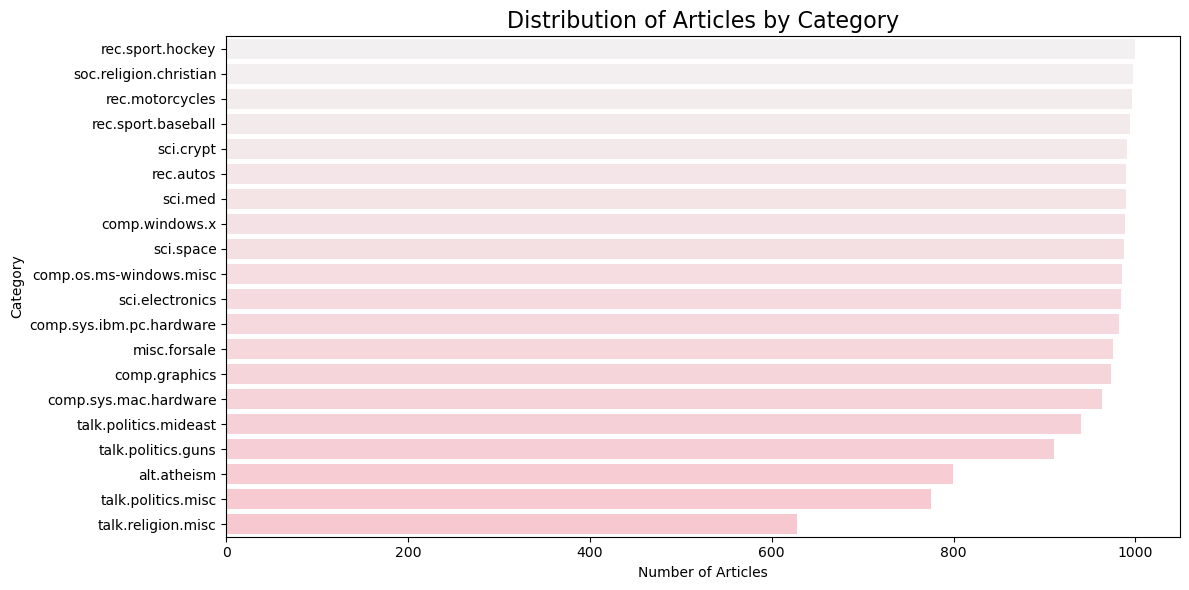

In [6]:
plt.figure(figsize=(12, 6))
pink_gradient = sns.light_palette("pink", n_colors=20)  
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette=pink_gradient)
plt.title('Distribution of Articles by Category', fontsize=16)
plt.xlabel('Number of Articles')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [7]:
df['Text Length'] = df['Text'].apply(len)


In [8]:

# Calculate the mean (average) text length
mean_text_length = df['Text Length'].mean()

# Calculate the maximum text length
max_text_length = df['Text Length'].max()

# Calculate the minimum text length (optional, to see the shortest text length)
min_text_length = df['Text Length'].min()

# Print the results
print(f"Mean (Average) Text Length: {mean_text_length}")
print(f"Maximum Text Length: {max_text_length}")
print(f"Minimum Text Length: {min_text_length}")


Mean (Average) Text Length: 1902.5258940889314
Maximum Text Length: 160616
Minimum Text Length: 115


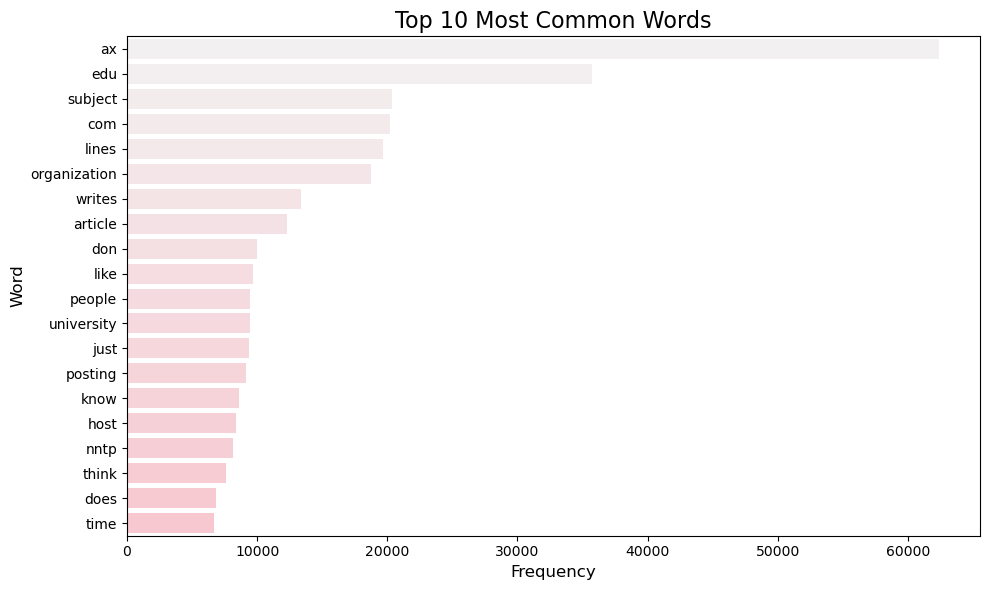

In [9]:


vectorizer = CountVectorizer(stop_words='english', max_features=20)  # You can adjust max_features as needed
X = vectorizer.fit_transform(X_with_metadata)  # X_with_metadata contains the article text

word_counts = X.toarray().sum(axis=0)

words = vectorizer.get_feature_names_out()

word_freq = pd.DataFrame({'Word': words, 'Frequency': word_counts})

# Sort by frequency to get the most common words
word_freq = word_freq.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq.head(20), palette=pink_gradient)
plt.title('Top 10 Most Common Words', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.tight_layout()
plt.show()


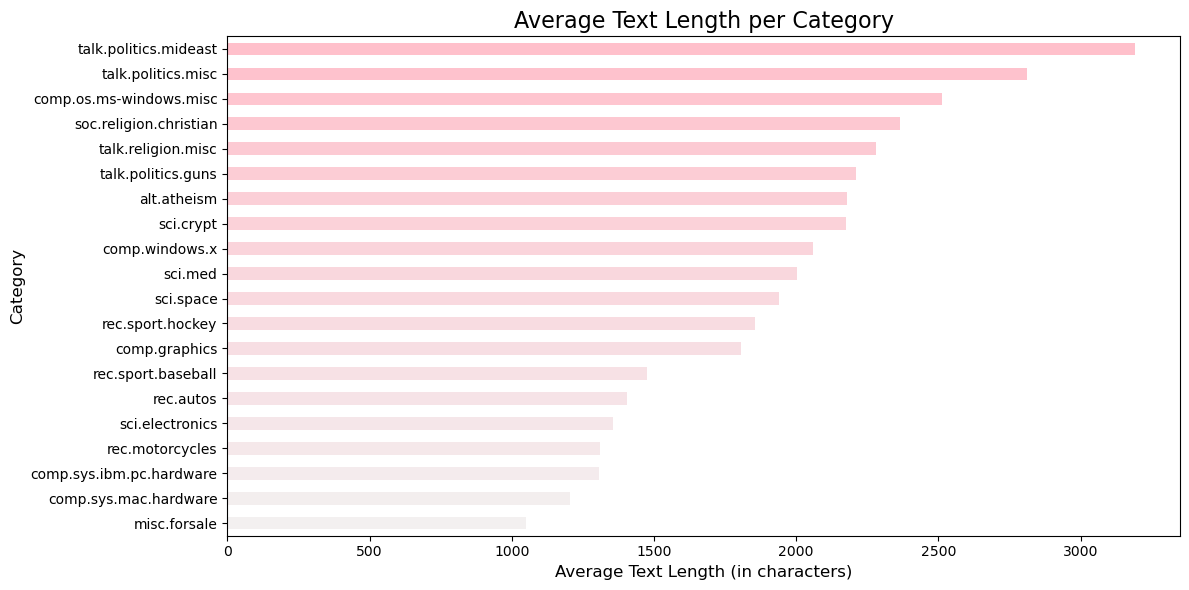

In [10]:
avg_text_length = df.groupby('Category')['Text Length'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_text_length.plot(kind='barh', color=pink_gradient)
plt.title('Average Text Length per Category', fontsize=16)
plt.xlabel('Average Text Length (in characters)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()


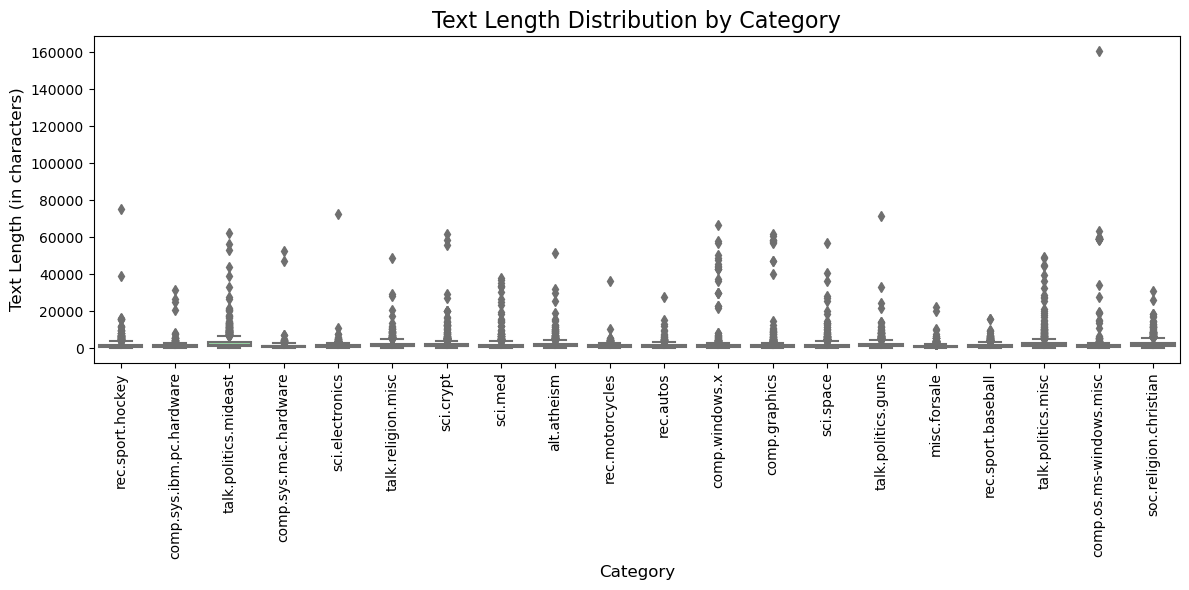

In [11]:

df['Text Length'] = df['Text'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Text Length', data=df, palette="pastel")
plt.xticks(rotation=90)
plt.title('Text Length Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Text Length (in characters)', fontsize=12)
plt.tight_layout()

In [12]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [13]:
df_newsgroups = pd.DataFrame({
    'Category': newsgroups.target,
    'Text': newsgroups.data    
})

df_newsgroups.head()

,Category,Text
0,10,\n\nI am sure some bashers of Pens fans are pr...
1,3,My brother is in the market for a high-perform...
2,17,\n\n\n\n\tFinally you said what you dream abou...
3,3,\nThink!\n\nIt's the SCSI card doing the DMA t...
4,4,1) I have an old Jasmine drive which I cann...


In [14]:
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove special characters and digits (keep letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])

    return text

In [15]:
df_newsgroups['cleaned_text'] = df_newsgroups['Text'].apply(clean_text)

In [16]:
nlp = spacy.load('en_core_web_sm')

In [17]:
def lemmatize_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Join lemmatized tokens, excluding stopwords, punctuation, and spaces
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Apply lemmatization to the 'cleaned_text' column
df_newsgroups['lemmatized_text'] = df_newsgroups['cleaned_text'].apply(lemmatize_text)

# Display the first few rows with original and lemmatized text
print(df_newsgroups[['cleaned_text', 'lemmatized_text']].head())

                                        cleaned_text  \
0  sure bashers pens fans pretty confused lack ki...   
1  brother market highperformance video card supp...   
2  finally said dream mediterranean new area grea...   
3  think scsi card doing dma transfers disks scsi...   
4  old jasmine drive use new understanding upsate...   

                                     lemmatized_text  
0  sure basher pen fan pretty confused lack kind ...  
1  brother market highperformance video card supp...  
2  finally say dream mediterranean new area great...  
3  think scsi card dma transfer disk scsi card dm...  
4  old jasmine drive use new understanding upsate...  


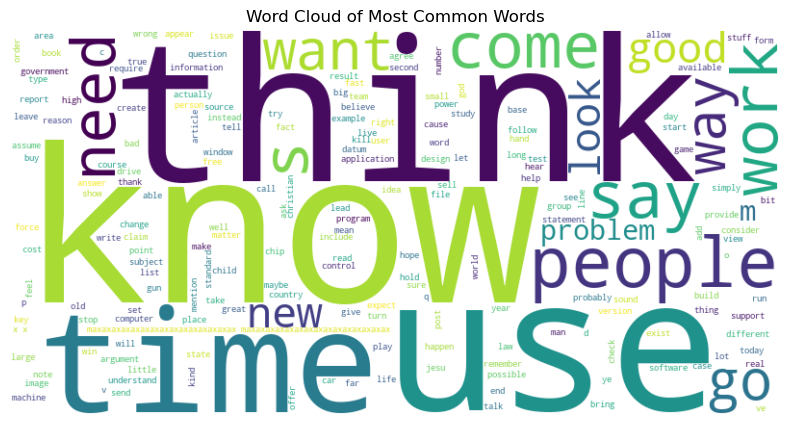

In [18]:
from wordcloud import WordCloud

# Combine all lemmatized text
text = ' '.join(df_newsgroups['lemmatized_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Common Words")
plt.show()


In [19]:
df_newsgroups['unique_word_count'] = df_newsgroups['lemmatized_text'].apply(lambda x: len(set(x.split())))
print(df_newsgroups[['Category', 'unique_word_count']].groupby('Category').mean())


          unique_word_count
Category                   
0                 56.535670
1                 56.557040
2                 51.760406
3                 39.428717
4                 35.418484
5                 59.137652
6                 41.593846
7                 38.403030
8                 35.651606
9                 40.964789
10                52.962963
11                67.896065
12                39.648374
13                64.405051
14                62.579534
15                78.092277
16                61.259341
17                99.445745
18                73.331613
19                62.738854


Category
0     56.535670
1     56.557040
2     51.760406
3     39.428717
4     35.418484
5     59.137652
6     41.593846
7     38.403030
8     35.651606
9     40.964789
10    52.962963
11    67.896065
12    39.648374
13    64.405051
14    62.579534
15    78.092277
16    61.259341
17    99.445745
18    73.331613
19    62.738854
Name: unique_word_count, dtype: float64


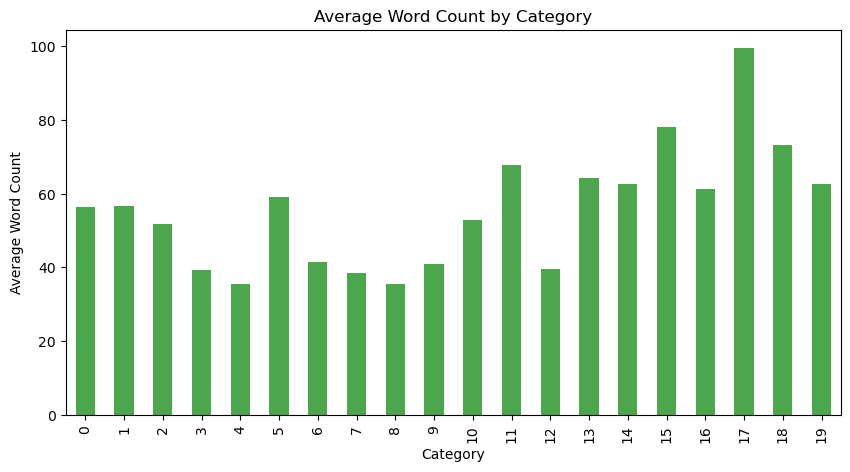

In [20]:
# Average word count per category
category_word_count = df_newsgroups.groupby('Category')['unique_word_count'].mean()
print(category_word_count)

# Visualization
category_word_count.plot(kind='bar', figsize=(10, 5), color='green', alpha=0.7)
plt.title("Average Word Count by Category")
plt.xlabel("Category")
plt.ylabel("Average Word Count")
plt.show()


In [21]:
df_newsgroups

,Category,Text,cleaned_text,lemmatized_text,unique_word_count
0,10,\n\nI am sure some bashers of Pens fans are pr...,sure bashers pens fans pretty confused lack ki...,sure basher pen fan pretty confused lack kind ...,50
1,3,My brother is in the market for a high-perform...,brother market highperformance video card supp...,brother market highperformance video card supp...,25
2,17,\n\n\n\n\tFinally you said what you dream abou...,finally said dream mediterranean new area grea...,finally say dream mediterranean new area great...,85
3,3,\nThink!\n\nIt's the SCSI card doing the DMA t...,think scsi card doing dma transfers disks scsi...,think scsi card dma transfer disk scsi card dm...,35
4,4,1) I have an old Jasmine drive which I cann...,old jasmine drive use new understanding upsate...,old jasmine drive use new understanding upsate...,34
...,...,...,...,...,...
18841,13,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,dn nyedacnsvaxuwecedu david nye dn neurology d...,dn nyedacnsvaxuwecedu david nye dn neurology d...,98
18842,12,\nNot in isolated ground recepticles (usually ...,isolated ground recepticles usually unusual co...,isolate ground recepticle usually unusual colo...,15
18843,3,I just installed a DX2-66 CPU in a clone mothe...,just installed dx cpu clone motherboard tried ...,instal dx cpu clone motherboard try mount cpu ...,32
18844,1,\nWouldn't this require a hyper-sphere. In 3-...,wouldnt require hypersphere space points speci...,not require hypersphere space point specifie s...,18


count    18846.000000
mean       599.961159
std       1944.572140
min          0.000000
25%        119.000000
50%        249.000000
75%        500.000000
max      68338.000000
Name: char_count, dtype: float64


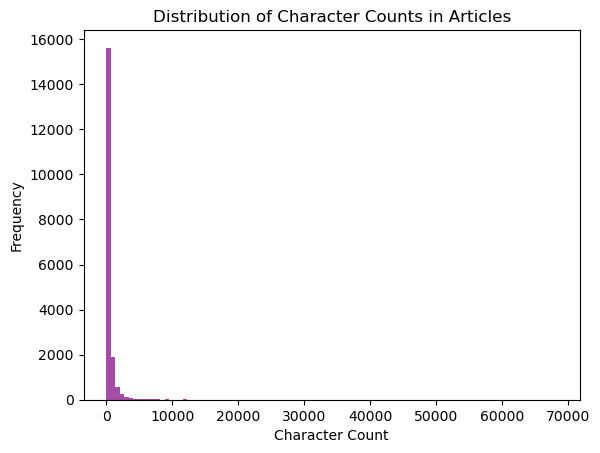

In [22]:
# Calculate character count
df_newsgroups['char_count'] = df_newsgroups['lemmatized_text'].apply(len)

# Summary statistics for character count
print(df_newsgroups['char_count'].describe())

# Histogram for character count distribution
import matplotlib.pyplot as plt
plt.hist(df_newsgroups['char_count'], bins=100, color='purple', alpha=0.7)
plt.title("Distribution of Character Counts in Articles")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()


In [23]:
df_newsgroups

,Category,Text,cleaned_text,lemmatized_text,unique_word_count,char_count
0,10,\n\nI am sure some bashers of Pens fans are pr...,sure bashers pens fans pretty confused lack ki...,sure basher pen fan pretty confused lack kind ...,50,363
1,3,My brother is in the market for a high-perform...,brother market highperformance video card supp...,brother market highperformance video card supp...,25,204
2,17,\n\n\n\n\tFinally you said what you dream abou...,finally said dream mediterranean new area grea...,finally say dream mediterranean new area great...,85,707
3,3,\nThink!\n\nIt's the SCSI card doing the DMA t...,think scsi card doing dma transfers disks scsi...,think scsi card dma transfer disk scsi card dm...,35,431
4,4,1) I have an old Jasmine drive which I cann...,old jasmine drive use new understanding upsate...,old jasmine drive use new understanding upsate...,34,300
...,...,...,...,...,...,...
18841,13,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,dn nyedacnsvaxuwecedu david nye dn neurology d...,dn nyedacnsvaxuwecedu david nye dn neurology d...,98,978
18842,12,\nNot in isolated ground recepticles (usually ...,isolated ground recepticles usually unusual co...,isolate ground recepticle usually unusual colo...,15,116
18843,3,I just installed a DX2-66 CPU in a clone mothe...,just installed dx cpu clone motherboard tried ...,instal dx cpu clone motherboard try mount cpu ...,32,272
18844,1,\nWouldn't this require a hyper-sphere. In 3-...,wouldnt require hypersphere space points speci...,not require hypersphere space point specifie s...,18,147


In [24]:
category_mapping = {i: name for i, name in enumerate(newsgroups.target_names)}

# Assuming 'category' column in the dataframe contains numeric labels
df_newsgroups['category_name'] = df_newsgroups['Category'].map(category_mapping)

# Verify the mapping
print(df_newsgroups[['Category', 'category_name']].head())

   Category             category_name
0        10          rec.sport.hockey
1         3  comp.sys.ibm.pc.hardware
2        17     talk.politics.mideast
3         3  comp.sys.ibm.pc.hardware
4         4     comp.sys.mac.hardware


In [25]:
df_newsgroups

,Category,Text,cleaned_text,lemmatized_text,unique_word_count,char_count,category_name
0,10,\n\nI am sure some bashers of Pens fans are pr...,sure bashers pens fans pretty confused lack ki...,sure basher pen fan pretty confused lack kind ...,50,363,rec.sport.hockey
1,3,My brother is in the market for a high-perform...,brother market highperformance video card supp...,brother market highperformance video card supp...,25,204,comp.sys.ibm.pc.hardware
2,17,\n\n\n\n\tFinally you said what you dream abou...,finally said dream mediterranean new area grea...,finally say dream mediterranean new area great...,85,707,talk.politics.mideast
3,3,\nThink!\n\nIt's the SCSI card doing the DMA t...,think scsi card doing dma transfers disks scsi...,think scsi card dma transfer disk scsi card dm...,35,431,comp.sys.ibm.pc.hardware
4,4,1) I have an old Jasmine drive which I cann...,old jasmine drive use new understanding upsate...,old jasmine drive use new understanding upsate...,34,300,comp.sys.mac.hardware
...,...,...,...,...,...,...,...
18841,13,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,dn nyedacnsvaxuwecedu david nye dn neurology d...,dn nyedacnsvaxuwecedu david nye dn neurology d...,98,978,sci.med
18842,12,\nNot in isolated ground recepticles (usually ...,isolated ground recepticles usually unusual co...,isolate ground recepticle usually unusual colo...,15,116,sci.electronics
18843,3,I just installed a DX2-66 CPU in a clone mothe...,just installed dx cpu clone motherboard tried ...,instal dx cpu clone motherboard try mount cpu ...,32,272,comp.sys.ibm.pc.hardware
18844,1,\nWouldn't this require a hyper-sphere. In 3-...,wouldnt require hypersphere space points speci...,not require hypersphere space point specifie s...,18,147,comp.graphics


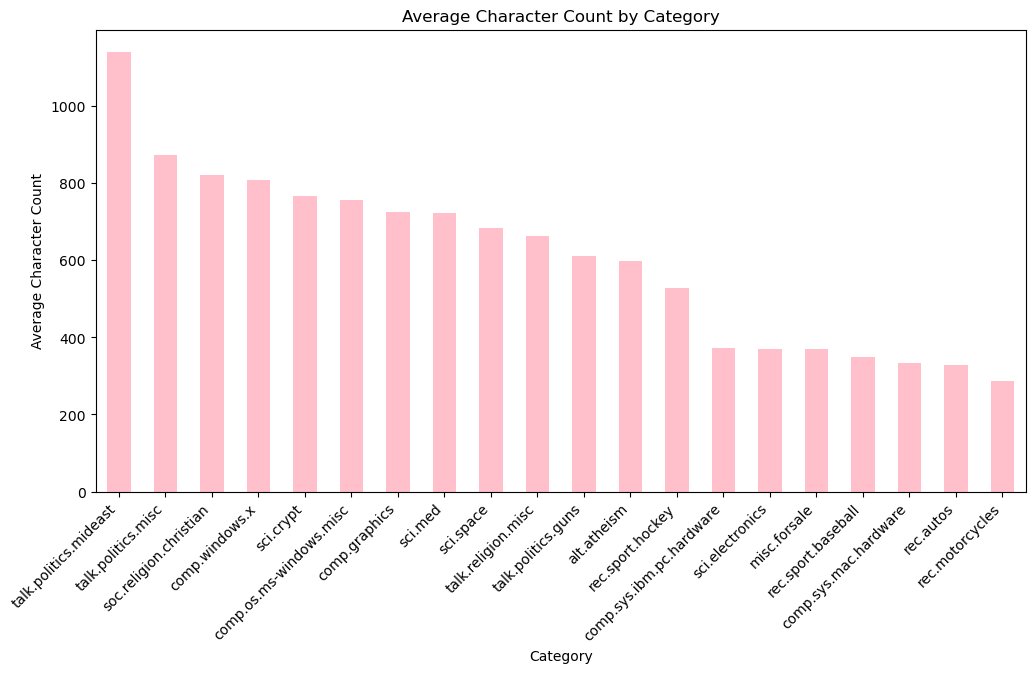

In [26]:
# Calculate average character length per category
avg_char_count = df_newsgroups.groupby('category_name')['char_count'].mean()

# Plot average character length by category
avg_char_count.sort_values(ascending=False).plot(kind='bar', color='pink', figsize=(12, 6))
plt.title("Average Character Count by Category")
plt.xlabel("Category")
plt.ylabel("Average Character Count")
plt.xticks(rotation=45, ha='right')
plt.show()


In [27]:
## Svm with tf-idf verctorizer on all data

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize your cleaned text
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df_newsgroups['cleaned_text'])

# Get the number of features (words)
num_features = X_tfidf.shape[1]
print(f"Number of features: {num_features}")


Number of features: 116765


          Term   Frequency
47122     just  243.018907
51145     like  242.934684
48622     know  240.946988
25145     dont  239.985079
79051   people  207.763828
102876   think  203.595734
24960     does  201.390874
42419       im  200.816751
108003     use  176.421135
102494  thanks  173.696994


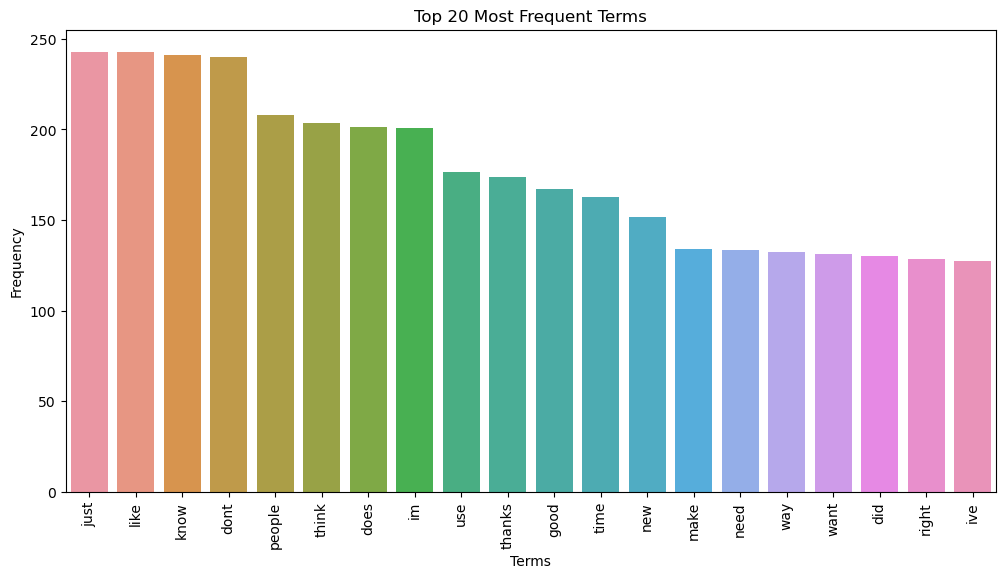

In [29]:
# Get term frequencies from the TF-IDF matrix
term_frequencies = X_tfidf.sum(axis=0).A1  # Sum frequencies across all documents
terms = vectorizer.get_feature_names_out()

# Create a DataFrame with terms and their frequencies
term_freq_df = pd.DataFrame(list(zip(terms, term_frequencies)), columns=['Term', 'Frequency'])

# Sort the DataFrame by frequency in descending order
term_freq_df_sorted = term_freq_df.sort_values(by='Frequency', ascending=False)

# Display the top 10 most frequent terms
print(term_freq_df_sorted.head(10))

# Optionally, plot the top 20 most frequent terms
plt.figure(figsize=(12, 6))
sns.barplot(x=term_freq_df_sorted['Term'][:20], y=term_freq_df_sorted['Frequency'][:20])
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Terms')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.show()
